# 531-A3

In my assignment, I will use my own dataset and make a comparison of different model.  
The dataset is birds, there are 6 kinds of birds in 600 pictures(each kind has 100 pictures).  
Each picture is RGB picture, and the 6 kinds are: Egret, Mandarin duck, Snowy owl,Puffin, Toucan and Wood duck. 
  
I found that there are some famous model of convonlution.   
In this assignment I will use LeNet-5 model and VGG19 model.    
Then, I will use my designed model.
I will use a different optimizer, the learning rate is 0.0003.

In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,ZeroPadding2D,AveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.callbacks import History  
from keras.callbacks import ModelCheckpoint  
import keras  
import warnings
warnings.filterwarnings('ignore')
from keras.optimizers import Adam, SGD

Using TensorFlow backend.


### Here are some import parameters.  
I use 70% of the dataset as train data, and use 30% as test data.

In [2]:
# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = 'data2/train'
validation_data_dir = 'data2/validation'
nb_train_samples = 540
nb_validation_samples = 60
epochs = 50
batch_size = 20

In [3]:
if K.image_data_format() == 'channels_first':
    input_shape32 = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)
    
smpSize = input_shape

### Data augmentation  
Because the size of bird dataset is small, so we need to extend the database.  
The code below means generating a batch of data in an infinite loop. 

In [4]:
# this is the augmentation configuration we will use for training
# set the parameters of pictures 
train_data = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_data = ImageDataGenerator(rescale=1. / 255)

train_generator = train_data.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical') 

validation_generator = test_data.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical') 

Found 540 images belonging to 6 classes.
Found 60 images belonging to 6 classes.


## LeNet-5 model

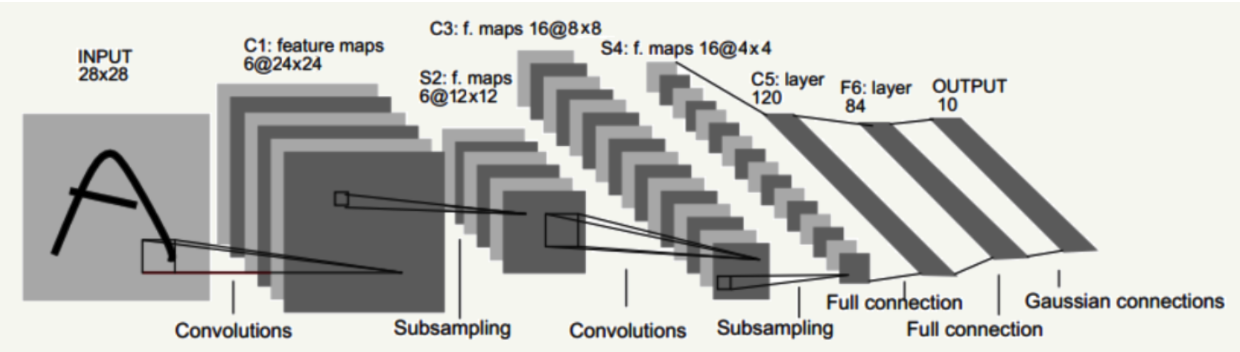

The model has 8 layers, 1 input layer, 3 convonlution layer, 2 subsampling layer, 1 full connection layer and 1 output layer. Each layer has many feature map.  
The work of layers before the full connection layer is feature extraction.

In [5]:
#Model of LeNet-5
model2 = Sequential()

model2.add(Conv2D(6, kernel_size=(5, 5),activation='relu',input_shape=smpSize))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Activation("relu"))


model2.add(Conv2D(16, kernel_size=(5, 5),activation='relu',input_shape=smpSize))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Activation("relu"))


model2.add(Conv2D(120, kernel_size=(1, 1),activation='relu',input_shape=smpSize))

model2.add(Flatten())
model2.add(Dense(50, activation="sigmoid"))
model2.add(Dense(6, activation='softmax'))

sgd = Adam(lr=0.0003)
model2.compile(loss='binary_crossentropy',optimizer=sgd, metrics=['accuracy'])

# vitralization the model 
model2.summary()

from keras.utils import plot_model
plot_model(model2, to_file='model2-LeNet-5.png',show_shapes=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 146, 146, 6)       456       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 6)         0         
_________________________________________________________________
activation_1 (Activation)    (None, 73, 73, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 69, 69, 16)        2416      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 34, 34, 16)        0         
_________________________________________________________________
activation_2 (Activation)    (None, 34, 34, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 120)       2040      
__________

In [6]:
history2 = History()  
model_checkpoint2 = ModelCheckpoint('temp_model.hdf5', monitor='loss', save_best_only=True)  
tb_cb2 = keras.callbacks.TensorBoard(log_dir='log', write_images=1, histogram_freq=0)  

callbacks2 = [  
        history2,  
        model_checkpoint2,  
        tb_cb2  
    ]  

#fit model  
history2=model2.fit_generator(  
    train_generator,  
    steps_per_epoch=nb_train_samples // batch_size,  
    epochs=epochs,  
    callbacks=callbacks2,  
    validation_data=validation_generator,  
    validation_steps=nb_validation_samples // batch_size,  
    verbose = 2)  

Epoch 1/50
 - 13s - loss: 0.4580 - acc: 0.8333 - val_loss: 0.4238 - val_acc: 0.8333
Epoch 2/50
 - 13s - loss: 0.4040 - acc: 0.8349 - val_loss: 0.3952 - val_acc: 0.8472
Epoch 3/50
 - 13s - loss: 0.3442 - acc: 0.8488 - val_loss: 0.3447 - val_acc: 0.8444
Epoch 4/50
 - 13s - loss: 0.3174 - acc: 0.8605 - val_loss: 0.3115 - val_acc: 0.8444
Epoch 5/50
 - 13s - loss: 0.2818 - acc: 0.8765 - val_loss: 0.2987 - val_acc: 0.8694
Epoch 6/50
 - 14s - loss: 0.2565 - acc: 0.8975 - val_loss: 0.2799 - val_acc: 0.8750
Epoch 7/50
 - 14s - loss: 0.2598 - acc: 0.8907 - val_loss: 0.2776 - val_acc: 0.8889
Epoch 8/50
 - 14s - loss: 0.2369 - acc: 0.9046 - val_loss: 0.2639 - val_acc: 0.8889
Epoch 9/50
 - 14s - loss: 0.2215 - acc: 0.9204 - val_loss: 0.2878 - val_acc: 0.8833
Epoch 10/50
 - 14s - loss: 0.2119 - acc: 0.9272 - val_loss: 0.2584 - val_acc: 0.8833
Epoch 11/50
 - 14s - loss: 0.2063 - acc: 0.9201 - val_loss: 0.2455 - val_acc: 0.9111
Epoch 12/50
 - 15s - loss: 0.1996 - acc: 0.9278 - val_loss: 0.2585 - val_a

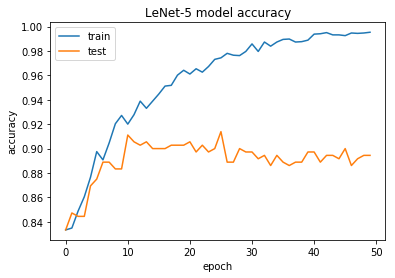

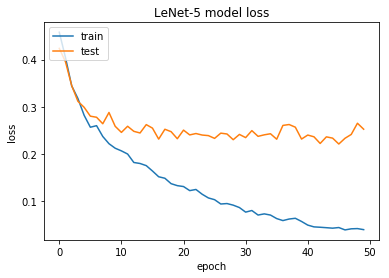

In [8]:
# draw the draw the curve of accuracy and loss
model2.save('fine_tune_model.h5')  
model2.save_weights('fine_tune_model_weight')  
  
from matplotlib import pyplot as plt  
plt.figure()
plt.plot(history2.history['acc'])   
plt.plot(history2.history['val_acc'])  
plt.title('LeNet-5 model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show() 

plt.figure()
plt.plot(history2.history['loss'])  
plt.plot(history2.history['val_loss'])  
plt.title('LeNet-5 model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()  

From the results, LeNet-5 model performances well in training data, most of the accuracy in training data are bigger than 95%. However, LeNet-5 models little worse in training data, most accuracy are between 90% and 92%. The tendency of accuracy in test data is less stable than the accuracy in training data. And the tendency of latter part in test data's accuracy shows decreasing. 
  
In conclusion, although this model performance well in training data, not test data.

## VGG19 model  
VGG19 is a more deep model.  
There are  5 parts in the model.  
Except for the softmax layer, the other last layers are full connection. Model uses Maxpool to connect 5 parts.   

VGG model perfromance well in image detection, this structure can preserve the images' details. 
vgg19.png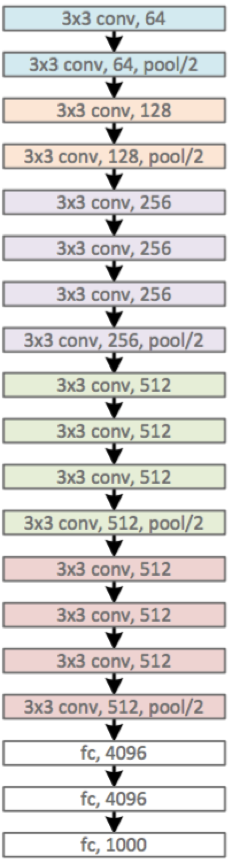

Because VGG-19's structure is too big, so I tried many different optimizer, the optimizer in the demo performances well. So I choose it.  
And because the structure is too big, I have to short the epochs into 20.

In [19]:
#VGG-19
model3 = Sequential()
model3.add(ZeroPadding2D((1,1),input_shape=smpSize))
model3.add(Conv2D(64, 3, 3, activation='relu'))
model3.add(ZeroPadding2D((1,1)))
model3.add(Conv2D(64, 3, 3, activation='relu'))
model3.add(MaxPooling2D((2,2), strides=(2,2)))
model3.add(ZeroPadding2D((1,1)))
model3.add(Conv2D(128, 3, 3, activation='relu'))
model3.add(ZeroPadding2D((1,1)))
model3.add(Conv2D(128, 3, 3, activation='relu'))
model3.add(MaxPooling2D((2,2), strides=(2,2)))
model3.add(ZeroPadding2D((1,1)))
model3.add(Conv2D(256, 3, 3, activation='relu'))
model3.add(ZeroPadding2D((1,1)))
model3.add(Conv2D(256, 3, 3, activation='relu'))
model3.add(ZeroPadding2D((1,1)))
model3.add(Conv2D(256, 3, 3, activation='relu'))
model3.add(ZeroPadding2D((1,1)))
model3.add(Conv2D(256, 3, 3, activation='relu'))
model3.add(MaxPooling2D((2,2), strides=(2,2)))
model3.add(ZeroPadding2D((1,1)))
model3.add(Conv2D(512, 3, 3, activation='relu'))
model3.add(ZeroPadding2D((1,1)))
model3.add(Conv2D(512, 3, 3, activation='relu'))
model3.add(ZeroPadding2D((1,1)))
model3.add(Conv2D(512, 3, 3, activation='relu'))
model3.add(ZeroPadding2D((1,1)))
model3.add(Conv2D(512, 3, 3, activation='relu'))
model3.add(MaxPooling2D((2,2), strides=(2,2)))
model3.add(ZeroPadding2D((1,1)))
model3.add(Conv2D(512, 3, 3, activation='relu'))
model3.add(ZeroPadding2D((1,1)))
model3.add(Conv2D(512, 3, 3, activation='relu'))
model3.add(ZeroPadding2D((1,1)))
model3.add(Conv2D(512, 3, 3, activation='relu'))
model3.add(ZeroPadding2D((1,1)))
model3.add(Conv2D(512, 3, 3, activation='relu'))
model3.add(MaxPooling2D((2,2), strides=(2,2)))
model3.add(Flatten())
model3.add(Dense(4096, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(4096, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(6, activation='softmax'))

sgd = Adam(lr=0.0003)
model3.compile(loss='binary_crossentropy',optimizer=sgd, metrics=['accuracy'])
model3.summary()

from keras.utils import plot_model
plot_model(model3, to_file='model3-VGG model.png',show_shapes=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_17 (ZeroPaddi (None, 152, 152, 3)       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 150, 150, 64)      1792      
_________________________________________________________________
zero_padding2d_18 (ZeroPaddi (None, 152, 152, 64)      0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 150, 150, 64)      36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 75, 75, 64)        0         
_________________________________________________________________
zero_padding2d_19 (ZeroPaddi (None, 77, 77, 64)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 75, 75, 128)       73856     
__________

In [22]:
history3 = History()  
model_checkpoint3 = ModelCheckpoint('temp_model.hdf5', monitor='loss', save_best_only=True)  
tb_cb3 = keras.callbacks.TensorBoard(log_dir='log', write_images=1, histogram_freq=0)  

callbacks3 = [  
        history3,  
        model_checkpoint3,  
        tb_cb3  
    ]  

#fit model  
history3=model3.fit_generator(  
    train_generator,  
    steps_per_epoch=nb_train_samples // batch_size,  
    epochs=20,  
    callbacks=callbacks3,  
    validation_data=validation_generator,  
    validation_steps=nb_validation_samples // batch_size,  
    verbose = 2)  

Epoch 1/20
 - 432s - loss: 0.4508 - acc: 0.8333 - val_loss: 0.4506 - val_acc: 0.8333
Epoch 2/20
 - 426s - loss: 0.4508 - acc: 0.8333 - val_loss: 0.4506 - val_acc: 0.8333
Epoch 3/20
 - 423s - loss: 0.4506 - acc: 0.8333 - val_loss: 0.4506 - val_acc: 0.8333
Epoch 4/20
 - 404s - loss: 0.4507 - acc: 0.8333 - val_loss: 0.4506 - val_acc: 0.8333
Epoch 5/20
 - 386s - loss: 0.4509 - acc: 0.8333 - val_loss: 0.4506 - val_acc: 0.8333
Epoch 6/20
 - 388s - loss: 0.4508 - acc: 0.8333 - val_loss: 0.4506 - val_acc: 0.8333
Epoch 7/20
 - 385s - loss: 0.4508 - acc: 0.8333 - val_loss: 0.4506 - val_acc: 0.8333
Epoch 8/20
 - 386s - loss: 0.4507 - acc: 0.8333 - val_loss: 0.4506 - val_acc: 0.8333
Epoch 9/20
 - 387s - loss: 0.4508 - acc: 0.8333 - val_loss: 0.4506 - val_acc: 0.8333
Epoch 10/20
 - 387s - loss: 0.4507 - acc: 0.8333 - val_loss: 0.4506 - val_acc: 0.8333
Epoch 11/20
 - 385s - loss: 0.4506 - acc: 0.8333 - val_loss: 0.4506 - val_acc: 0.8333
Epoch 12/20
 - 388s - loss: 0.4506 - acc: 0.8333 - val_loss: 0.

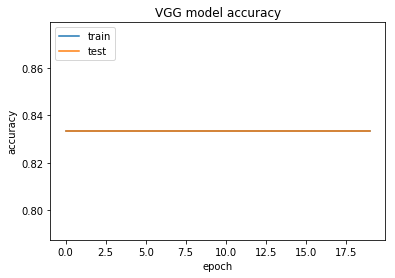

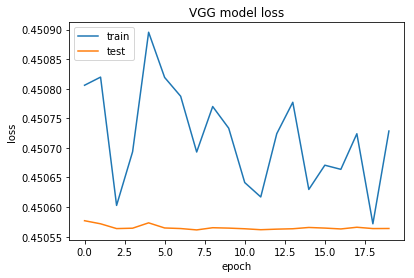

In [29]:
# draw the draw the curve of accuracy and loss
model3.save('fine_tune_model.h5')  
model3.save_weights('fine_tune_model_weight')  
  
from matplotlib import pyplot as plt  
plt.figure()
plt.plot(history3.history['acc'])   
plt.plot(history3.history['val_acc'])  
plt.title('VGG model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show() 

plt.figure()
plt.plot(history3.history['loss'])  
plt.plot(history3.history['val_loss'])  
plt.title('VGG model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()  

Very bad results, both in training data and test data. I think the reason is this model's structure is too complex to my dataset. I search the model by google, the dataset using this model mostly is cifar10, a very big dataset. 

## Using the model I found in internet.  
This model combined some classical models of convonlution.  
The author uses in claasifying cat and dog, the author said the performance is good, let me try it. 

In [9]:
model4 = Sequential()

model4.add(Conv2D(32, kernel_size=(5, 5), input_shape=smpSize, activation='relu', padding='same'))
model4.add(MaxPooling2D())
model4.add(Dropout(0.3))

model4.add(Conv2D(64, kernel_size=(5, 5), activation='relu', padding='same'))
model4.add(MaxPooling2D())
model4.add(Dropout(0.3))

model4.add(Conv2D(128, kernel_size=(5, 5), activation='relu', padding='same'))
model4.add(MaxPooling2D())
model4.add(Dropout(0.5))

model4.add(Conv2D(256, kernel_size=(5, 5), activation='relu', padding='same'))
model4.add(MaxPooling2D())
model4.add(Dropout(0.5))

model4.add(Flatten())
model4.add(Dense(512, activation='relu'))
model4.add(Dropout(0.5))

model4.add(Dense(6, activation='softmax'))

sgd = Adam(lr=0.0003)
model4.compile(loss='binary_crossentropy',optimizer=sgd, metrics=['accuracy'])

model4.summary()

from keras.utils import plot_model
plot_model(model4, to_file='model4-model from internet.png',show_shapes=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 37, 37, 128)       204928    
__________

In [10]:
history4 = History()  
model_checkpoint4 = ModelCheckpoint('temp_model.hdf5', monitor='loss', save_best_only=True)  
tb_cb4 = keras.callbacks.TensorBoard(log_dir='log', write_images=1, histogram_freq=0)  

callbacks4 = [  
        history4,  
        model_checkpoint4,  
        tb_cb4  
    ]  

#fit model  
history4=model4.fit_generator(  
    train_generator,  
    steps_per_epoch=nb_train_samples // batch_size,  
    epochs=epochs,  
    callbacks=callbacks4,  
    validation_data=validation_generator,  
    validation_steps=nb_validation_samples // batch_size,  
    verbose = 2)  

Epoch 1/50
 - 61s - loss: 0.4953 - acc: 0.8253 - val_loss: 0.4506 - val_acc: 0.8333
Epoch 2/50
 - 58s - loss: 0.4506 - acc: 0.8333 - val_loss: 0.4504 - val_acc: 0.8333
Epoch 3/50
 - 60s - loss: 0.4485 - acc: 0.8333 - val_loss: 0.4496 - val_acc: 0.8333
Epoch 4/50
 - 60s - loss: 0.4365 - acc: 0.8333 - val_loss: 0.4234 - val_acc: 0.8333
Epoch 5/50
 - 61s - loss: 0.4125 - acc: 0.8333 - val_loss: 0.4119 - val_acc: 0.8333
Epoch 6/50
 - 62s - loss: 0.3793 - acc: 0.8448 - val_loss: 0.3865 - val_acc: 0.8361
Epoch 7/50
 - 72s - loss: 0.3727 - acc: 0.8478 - val_loss: 0.3737 - val_acc: 0.8472
Epoch 8/50
 - 69s - loss: 0.3533 - acc: 0.8469 - val_loss: 0.3578 - val_acc: 0.8528
Epoch 9/50
 - 74s - loss: 0.3314 - acc: 0.8546 - val_loss: 0.3224 - val_acc: 0.8528
Epoch 10/50
 - 69s - loss: 0.3267 - acc: 0.8546 - val_loss: 0.3278 - val_acc: 0.8528
Epoch 11/50
 - 65s - loss: 0.3133 - acc: 0.8620 - val_loss: 0.3242 - val_acc: 0.8583
Epoch 12/50
 - 65s - loss: 0.2881 - acc: 0.8694 - val_loss: 0.3140 - val_a

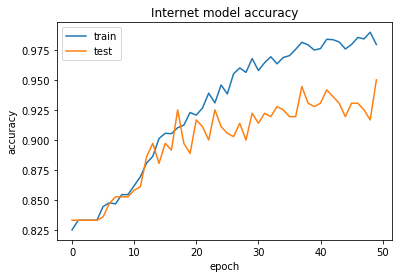

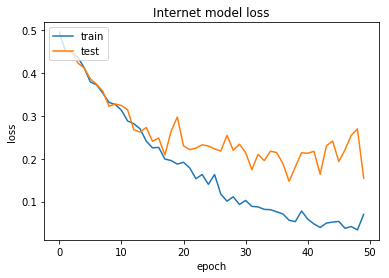

In [11]:
# draw the draw the curve of accuracy and loss
model4.save('fine_tune_model.h5')  
model4.save_weights('fine_tune_model_weight')  
  
from matplotlib import pyplot as plt  
plt.figure()
plt.plot(history4.history['acc'])   
plt.plot(history4.history['val_acc'])  
plt.title('Internet model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show() 

plt.figure()
plt.plot(history4.history['loss'])  
plt.plot(history4.history['val_loss'])  
plt.title('Internet model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()  

This model, same as LeNet-5 model, performances better in training data, but performances better in test data than LeNet-5 model. And the accurcay and loss are more stable than LeNet-5 model.The hole curve of test data is more closed to the curve of training data than LeNet-5 model. But the accuracy in test data is still worse than the accuracy in test data. The tendency of test is less stable than LeNet-5 model, in the latter parts, the tendency shows increasing. That is good. 

In conclusion, in my dataset, this model is better than LeNet-5 model.But this model needs much more time. I think author has tried many models before.

## Using my own model

According to the previous models, I found that not complex model can performance well. I think dataset is the reason. Because my dataset including mant birds pictures, but the sizes of all pictures are not same. So I have to resize the pictures, I don't think the resized dataset can be compare with the mature dataset such as MINST.  

I tried many models, this one is quite good.   
I only use 3 convonlution layers, so the constructure is very simple.  
Idea of the model is combined with LeNet-5 model and VGG model.  
Considering my dataset, so I reset the parameters of each layer.

In [12]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=smpSize))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(6)) 
model.add(Activation('softmax')) 

sgd = Adam(lr=0.0003)
model.compile(loss='binary_crossentropy',optimizer=sgd, metrics=['accuracy'])


model.summary()

from keras.utils import plot_model
plot_model(model, to_file='model-mine.png',show_shapes=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_3 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_4 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 64)        18496     
__________

In [13]:
history = History()  
model_checkpoint = ModelCheckpoint('temp_model.hdf5', monitor='loss', save_best_only=True)  
tb_cb = keras.callbacks.TensorBoard(log_dir='log', write_images=1, histogram_freq=0)  

callbacks = [  
        history,  
        model_checkpoint,  
        tb_cb  
    ]  

#fit model  
history=model.fit_generator(  
    train_generator,  
    steps_per_epoch=nb_train_samples // batch_size,  
    epochs=epochs,  
    callbacks=callbacks,  
    validation_data=validation_generator,  
    validation_steps=nb_validation_samples // batch_size,  
    verbose = 2)  

Epoch 1/50
 - 14s - loss: 0.4538 - acc: 0.8333 - val_loss: 0.4467 - val_acc: 0.8333
Epoch 2/50
 - 14s - loss: 0.4425 - acc: 0.8333 - val_loss: 0.4363 - val_acc: 0.8333
Epoch 3/50
 - 15s - loss: 0.4291 - acc: 0.8336 - val_loss: 0.4113 - val_acc: 0.8333
Epoch 4/50
 - 15s - loss: 0.4055 - acc: 0.8358 - val_loss: 0.3643 - val_acc: 0.8417
Epoch 5/50
 - 15s - loss: 0.3809 - acc: 0.8407 - val_loss: 0.3378 - val_acc: 0.8500
Epoch 6/50
 - 15s - loss: 0.3541 - acc: 0.8531 - val_loss: 0.3212 - val_acc: 0.8556
Epoch 7/50
 - 14s - loss: 0.3426 - acc: 0.8503 - val_loss: 0.3162 - val_acc: 0.8583
Epoch 8/50
 - 14s - loss: 0.3351 - acc: 0.8593 - val_loss: 0.3049 - val_acc: 0.8639
Epoch 9/50
 - 15s - loss: 0.3179 - acc: 0.8583 - val_loss: 0.3021 - val_acc: 0.8639
Epoch 10/50
 - 15s - loss: 0.3230 - acc: 0.8593 - val_loss: 0.3027 - val_acc: 0.8611
Epoch 11/50
 - 14s - loss: 0.3154 - acc: 0.8627 - val_loss: 0.2747 - val_acc: 0.8806
Epoch 12/50
 - 14s - loss: 0.3002 - acc: 0.8728 - val_loss: 0.2761 - val_a

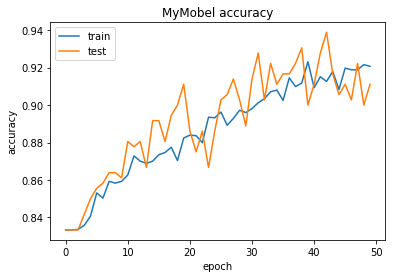

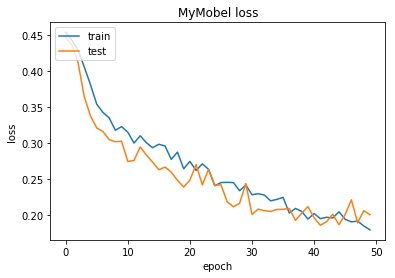

In [14]:
# draw the draw the curve of accuracy and loss
model.save('fine_tune_model.h5')  
model.save_weights('fine_tune_model_weight')  
  
from matplotlib import pyplot as plt  
plt.figure()
plt.plot(history.history['acc'])   
plt.plot(history.history['val_acc'])  
plt.title('MyMobel accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show() 

plt.figure()
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('MyMobel loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()  

My model performances well in both training data and test data. But the accuracy is lower than LeNet-5 model and internet model. Accuracy of test data is better than before, one epoch's accuracy is bigger than 93%. The curve of training data and test data are closed, the curve of test data is less stable than training data.  
Conclusion:My model uses less time and higher accuracy in test data.But the accuracy is still not perfect. 
  
Because of my dataser is not very standard, so the result of classification is not very good. However, in this assignment, I still learn a lot, I learned that each dataset has its own appropriate neuron network. More complex neuron network may not performances well in some dataset.  
So it is import to make dataset more standard and finding an appropriate structure of neuron network is also difficult.